# CAP 5768 - Data Science - Dr. Marques - Fall 2019

Christian Garbin

## Assignment 3: Statistical analysis - Part 1

### Goals 

- To transition from data analytics to basic statistical analysis.
- To practice the computation and displaying of summary statistics, percentiles, PMFs and (E)CDFs.
- To expand upon the prior experience of manipulating, summarizing, and visualizing small datasets. 
- To display and interpret bee swarm plots and box-and-whisker plots.
- To visualize and compute pairwise correlations among variables in the dataset.


### Instructions

- This assignment is structured as a single block, using the same dataset throughout.
- As usual, there will be some Python code to be written and questions to be answered.
- At the end, you should export your notebook to PDF format; it will "automagically" become your report.
- Submit the report (PDF), notebook (.ipynb file), and (optionally) link to the "live" version of your solution on Google Colaboratory via Canvas.
- The total number of points is 107 (plus up to 25 bonus points).

### Important

- It is OK to attempt the bonus points, but please **do not overdo it!** 

-------------------
## The Iris dataset

![Iris.png](notebook_images/iris.png)

The Python code below will load a dataset containing information about three types of Iris flowers that had the size of its petals and sepals carefully measured.

The Fisher’s Iris dataset contains 150 observations with 4 features each: 
- sepal length in cm; 
- sepal width in cm; 
- petal length in cm; and 
- petal width in cm. 

The class for each instance is stored in a separate column called “species”. In this case, the first 50 instances belong to class Setosa, the following 50 belong to class Versicolor and the last 50 belong to class Virginica.

See:
https://archive.ics.uci.edu/ml/datasets/Iris for additional information.
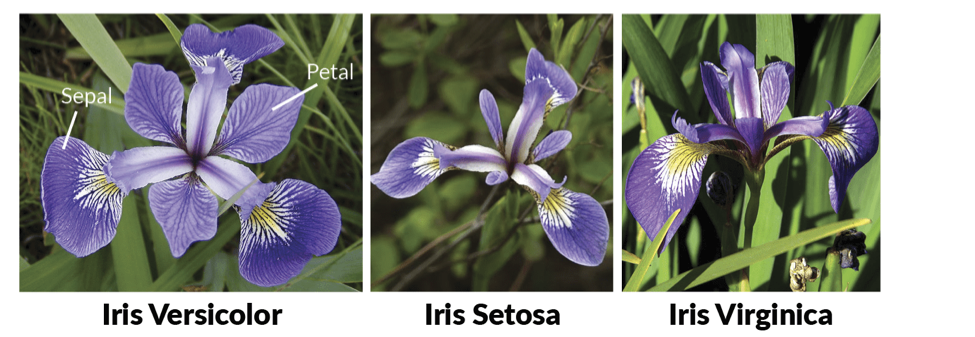

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Histogram and summary statistics 

The code below can be used to display the histogram of versicolor petal lengths (with meaningful labels for the axes and default option for number of bins). 

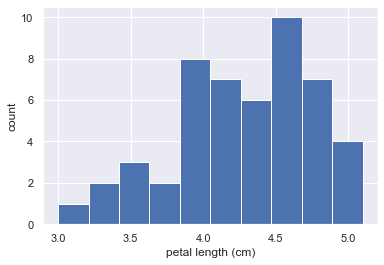

In [3]:
# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
plt.hist(versicolor_petal_length)

# Label axes
plt.xlabel('petal length (cm)')
plt.ylabel('count')

# Show histogram
plt.show()


## Your turn! (12 points)

Write code to:

1. Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)

*The "square root rule" is a commonly-used rule of thumb for choosing number of bins: choose the number of bins to be the square root of the number of samples.*

2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts) 

3. Compute summary statistics (2 pts each): mean and standard deviation 

## Solution

### 1. Modify the histogram above, this time using the "square root rule" for the number of bins. (4 pts)

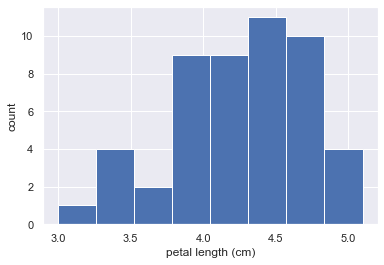

In [5]:
plt.hist(versicolor_petal_length, bins='sqrt')
plt.xlabel('petal length (cm)')
plt.ylabel('count')
plt.show()

### 2. Modify the histogram above, such that the y axis shows probability/proportion (rather than absolute count), i.e., a proper PMF. (4 pts)

How this is done: 

* Instead of using the actual value of each sample, we use the _weight_ of each sample.
* The _weight_ of each sample is simply its percentage in the number of samples.
* Given that we have 50 samples, each sample contributes 2% of weight.
* Once we plot it as a histogram, the 2% of weight of each sample is accumulated in its corresponding bin, so each bin adds up to the total weight (percentage) of samples that are in that bin.

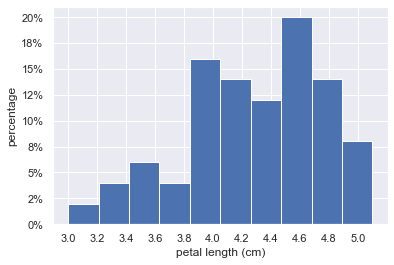

In [61]:
from matplotlib.ticker import PercentFormatter

# Start with a "1" for each sample, i.e. 50 x 1's
sample_pct = np.ones(len(versicolor_petal_length))
# Now divide by the number of samples
# Each entry is now 1/50, i.e. the weight of each sample (2%)
sample_pct /= len(versicolor_petal_length)

plt.hist(versicolor_petal_length, weights=sample_pct)
plt.xlabel('petal length (cm)')
plt.ylabel('percentage')

# Format y label: whole percentages
plt.gca().yaxis.set_major_formatter(
    PercentFormatter(xmax=1.0, decimals=0))
# Format x label: fine-grained range so we can see the
# lengths in each bin (would be better to align the
# labels with bins, but couldn't figure that out yet)
plt.xticks(np.arange(3, 5.2, step=0.2))

plt.show()

### 3. Compute summary statistics (2 pts each): mean and standard deviation

It's not clear in the question if we should summarize only the dataset we used for the histogram or all of them. To be thorough, and to practice, we will do both, versicolor and all of them.

In [44]:
print('Versicolor mean length is {:.2f} cm and the standard deviation is {:.2f} cm' \
      .format(versicolor_petal_length.mean(), versicolor_petal_length.std()))

Versicolor mean length is 4.26 cm and the standard deviation is 0.47 cm


In [66]:
iris.pivot_table('petal_length', index='species', aggfunc=['mean', 'std'])

,mean,std
,petal_length,petal_length
species,,
setosa,1.462,0.173664
versicolor,4.260,0.469911
virginica,5.552,0.551895


## Your turn! (6 points)

Make a bee swarm plot of the iris petal lengths. Your x-axis should contain each of the three species (properly labeld), and the y-axis the petal lengths. 


Your plot should look like this:

![iris_beeswarm.png](notebook_images/iris-swarmplot.png)
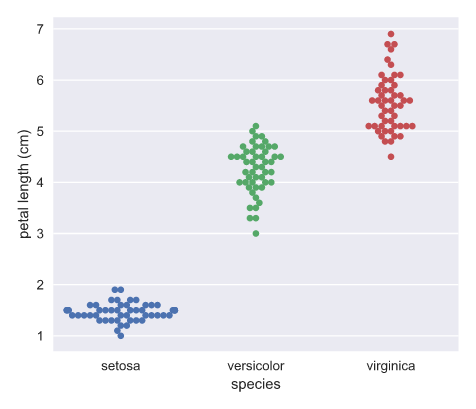

## Solution

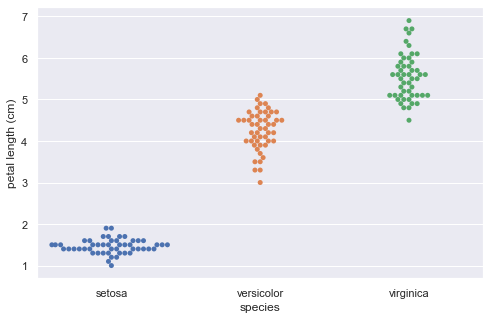

In [100]:
# Empirical: set size to have a nice spread of the dots
# That way can see the distribution better (fewer dots overlap)
plt.figure(figsize=(8, 5))

ax = sns.swarmplot(x='species', y='petal_length', data=iris)
ax.set_ylabel('petal length (cm)');

## Questions 1-2 (12 points, i.e. 6 pts each)

1. Explain the "binning bias" associated with histogram plots.

2. What is a bee swarm plot and in which situations should you (not) use it?

## Solution

(ENTER YOUR ANSWER HERE)

### 1. Explain the "binning bias" associated with histogram plots.

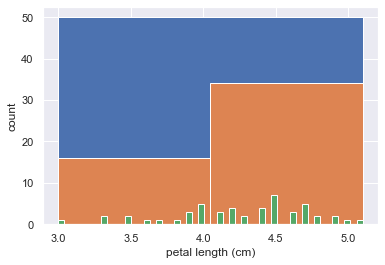

In [108]:
# Plot histogram of versicolor petal lengths
def plot_hist(bins):
    versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length
    plt.hist(versicolor_petal_length, bins=bins)

    # Label axes
    plt.xlabel('petal length (cm)')
    plt.ylabel('count')

plot_hist(1)
plot_hist(2)
plot_hist(50)

### 2. What is a bee swarm plot and in which situations should you (not) use it?

## Empirical Cumulative Distribution Function (ECDF)

The function below takes as input a 1D array of data and then returns the x and y values of the ECDF.

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

## Your turn! (12 points)

Use the ``ecdf()`` function above to compute the ECDF for the petal lengths of the Iris versicolor flowers (6 pts) and plot the resulting ECDF (6 pts).

Your plot should look like this:

![ecdf_versicolorpng.png](notebook_images/ecdf-versicolor.png)
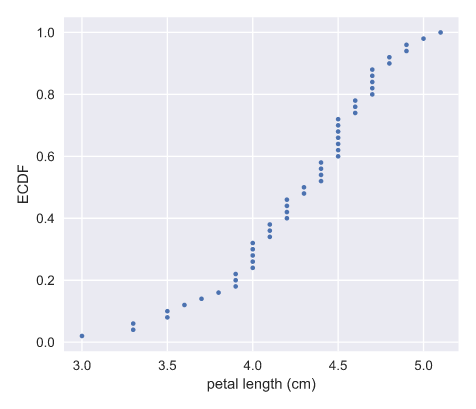

## Solution

In [6]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Your turn! (8 points)

Write code to plot ECDFs for the petal lengths of all three iris species.

Your plot should look like this:

![ECDFs_Iris.png](notebook_images/ecdf-iris.png)
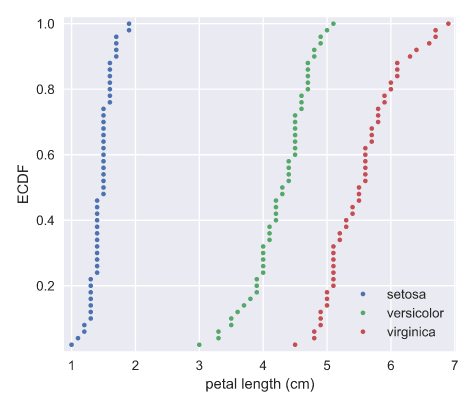

## Solution

In [7]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Percentiles

The code below computes the 25th, 50th, and 75th percentiles for the petal lengths of the Iris versicolor species and overlays the results on top of the ECDF.

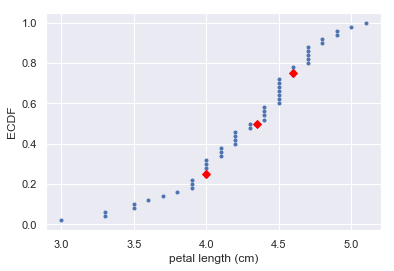

In [8]:
# Specify array of percentiles: percentiles
percentiles = np.array([25, 50, 75])

# Compute percentiles
ptiles_versicolor = np.percentile(versicolor_petal_length, percentiles)

# Compute ECDF
x_vers, y_vers = ecdf(versicolor_petal_length)
# Plot the ECDF
_ = plt.plot(x_vers, y_vers, '.')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Overlay percentiles as red diamonds.
_ = plt.plot(ptiles_versicolor, percentiles/100, marker='D', color='red',
         linestyle='none')

# Show the plot
plt.show()

## Your turn! (10 points)

Write code to compute the 25th, 50th, and 75th percentiles for the petal lengths of and plot the resulting values overlaid with the corresponding ECDFs for all three iris species.


## Solution

In [9]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Box-and-whisker plots

Box-and-whisker plots (or simply box plots) show the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. 
The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range.

![Box_plot.png](notebook_images/box-plot.png)
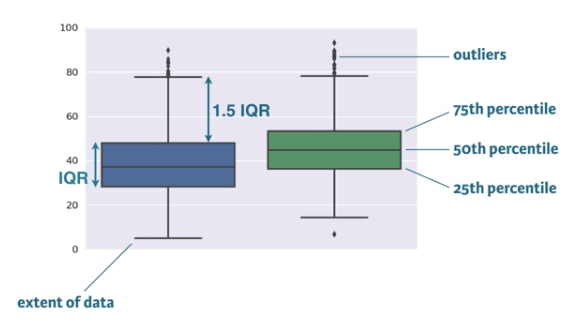

## Your turn! (10 points)

Write code to display the box-and-whisker plot for the petal lengths of all three iris species.

Your plot should look like this:

![Iris_boxplot.png](notebook_images/box-plot-iris.png)
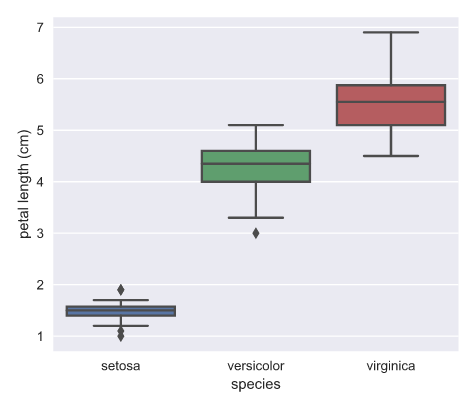

## Solution

In [10]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Questions 3-4 (6 points, i.e. 3 pts each)

3. Which species has the largest/smallest standard deviation?
4. Which species has the largest/smallest number of outliers?

## Solution

(ENTER YOUR ANSWER HERE)

## Bonus! (10 points)

Write code to display the box-and-whisker plot combined with the bee swarm plot for the petal lengths of all three iris species.

## Solution

In [11]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Scatter plots, pair plots, and correlation between two variables

The code below:

1. Displays the pair plots for all (4) attributes for all (3) categories/species/classes in the Iris dataset.
2. Computes the covariance matrix for the versicolor species.
3. Computes the Pearson correlation coefficient between petal length and petal width for the versicolor species.


Pearson correlation coefficient between petal length and petal width for versicolor species: 0.78667


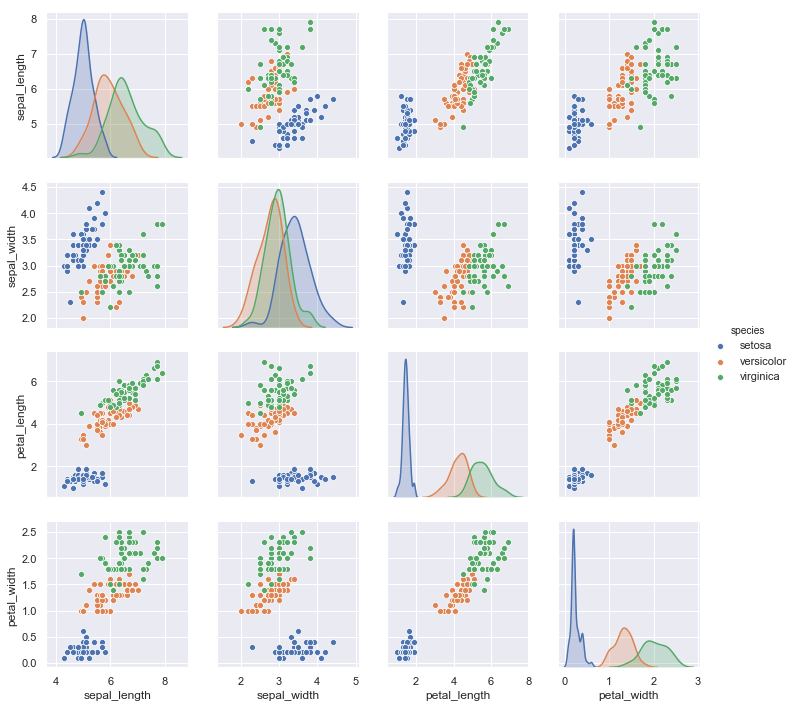

In [12]:
# Display pair plot
sns.pairplot(iris, hue='species', height=2.5);

# Compute 1D arrays for petal length and width
versicolor_petal_width = iris[iris.species == 'versicolor'].petal_width
versicolor_petal_length = iris[iris.species == 'versicolor'].petal_length

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r = pearson_r(versicolor_petal_length, versicolor_petal_width)
print('Pearson correlation coefficient between petal length and petal width for versicolor species: {:.5f}'.format(r))

## Bonus! (15 points)

Extend the code above to compute the Pearson correlation coeficients for all pair-wise combinations of all three Iris species and display the results in a table format.

## Solution

In [13]:
# ENTER YOUR CODE HERE
# ...
# ...
# ...

## Question 5 (6 points)

5. Should the Pearson correlation coefficient be replaced with the Spearman rank-order correlation coefficient in this case? Why (not)?

## Solution

(ENTER YOUR ANSWER HERE)

## Conclusions (25 points)

Write your conclusions and make sure to address the issues below:
- What have you learned from this assignment?
- Which parts were the most fun, time-consuming, enlightening, tedious?
- What would you do if you had an additional week to work on this?

## Solution

(WRITE YOUR CONCLUSIONS HERE)